Data analysis on Paycheck Protection Program

In [27]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [65]:
df = pd.read_csv('PPP Data 150k plus 080820.csv.', parse_dates=['DateApproved'], infer_datetime_format=True)

In [66]:
df.head()

LoanRange              BusinessName                Address  \
0  d $350,000-1 million              AERO BOX LLC                    NaN   
1  d $350,000-1 million   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E   
2  d $350,000-1 million  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD   
3  d $350,000-1 million     PLEASANT PLACES, INC.    7684 Southrail Road   
4  d $350,000-1 million     SUMTER COATINGS, INC.  2410 Highway 15 South   

               City State      Zip  NAICSCode             BusinessType  \
0               NaN   NaN      NaN   484210.0                      NaN   
1           SEATTLE   NaN  98112.0        NaN  Non-Profit Organization   
2    SAN BERNARDINO   NaN  92407.0   236115.0              Corporation   
3  North Charleston   NaN  29420.0   561730.0      Sole Proprietorship   
4            Sumter   NaN  29150.0   325510.0              Corporation   

  RaceEthnicity      Gender      Veteran NonProfit  JobsReported DateApproved  \
0    Unanswered  Unanswered   Unanswered       NaN           NaN   2020-05-03   
1    Unanswered  Unanswered   Unanswered         Y          75.0   2020-05-03   
2    Unanswered  Unanswered   Unanswered       NaN          21.0   2020-05-03   
3    Unanswered  Male Owned  Non-Veteran       NaN          73.0   2020-05-03   
4    Unanswered  Unanswered   Unanswered       NaN          62.0   2020-05-03   

                                  Lender     CD  
0           The Huntington National Bank    NaN  
1  Bank of America, National Association  WA-07  
2  Bank of America, National Association  CA-31  
3                           Synovus Bank  SC-01  
4                           Synovus Bank  SC-05

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662515 entries, 0 to 662514
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   LoanRange      662515 non-null  object        
 1   BusinessName   662510 non-null  object        
 2   Address        662498 non-null  object        
 3   City           662500 non-null  object        
 4   State          662499 non-null  object        
 5   Zip            662499 non-null  float64       
 6   NAICSCode      655800 non-null  float64       
 7   BusinessType   661110 non-null  object        
 8   RaceEthnicity  662515 non-null  object        
 9   Gender         662515 non-null  object        
 10  Veteran        662515 non-null  object        
 11  NonProfit      41993 non-null   object        
 12  JobsReported   622635 non-null  float64       
 13  DateApproved   662515 non-null  datetime64[ns]
 14  Lender         662515 non-null  object        
 15  

In [68]:
df.describe()

Zip      NAICSCode   JobsReported
count  662499.000000  655800.000000  622635.000000
mean    51334.381745  504320.424614      50.324980
std     30763.300635  177773.534782      69.585824
min       256.000000  111110.000000       0.000000
25%     23606.000000  337110.000000      16.000000
50%     48726.000000  541110.000000      28.000000
75%     79701.000000  621320.000000      54.000000
max     99929.000000  999990.000000     500.000000

In [69]:
df['LoanRange'].value_counts()

e $150,000-350,000      380636
d $350,000-1 million    199679
c $1-2 million           53218
b $2-5 million           24248
a $5-10 million           4734
Name: LoanRange, dtype: int64

We can see the LoanRange column has numbers, but is a range. We will create two columns from this -- an upper and lower range column. Fortunately each range has a number.

In [70]:
lower_bounds = {'a $5-10 million': 5000000,
               'b $2-5 million': 2000000,
               'c $1-2 million': 1000000,
               'd $350,000-1 million': 350000,
               'e $150,000-350,000': 150000}

upper_bounds = {'a $5-10 million': 10000000,
               'b $2-5 million': 5000000,
               'c $1-2 million': 2000000,
               'd $350,000-1 million': 1000000,
               'e $150,000-350,000': 350000}

In [71]:
df['LoanLowerBound'] = df['LoanRange'].replace(lower_bounds)
df['LoanUpperBound'] = df['LoanRange'].replace(upper_bounds)

In [72]:
df.head()

LoanRange              BusinessName                Address  \
0  d $350,000-1 million              AERO BOX LLC                    NaN   
1  d $350,000-1 million   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E   
2  d $350,000-1 million  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD   
3  d $350,000-1 million     PLEASANT PLACES, INC.    7684 Southrail Road   
4  d $350,000-1 million     SUMTER COATINGS, INC.  2410 Highway 15 South   

               City State      Zip  NAICSCode             BusinessType  \
0               NaN   NaN      NaN   484210.0                      NaN   
1           SEATTLE   NaN  98112.0        NaN  Non-Profit Organization   
2    SAN BERNARDINO   NaN  92407.0   236115.0              Corporation   
3  North Charleston   NaN  29420.0   561730.0      Sole Proprietorship   
4            Sumter   NaN  29150.0   325510.0              Corporation   

  RaceEthnicity      Gender      Veteran NonProfit  JobsReported DateApproved  \
0    Unanswered  Unanswered   Unanswered       NaN           NaN   2020-05-03   
1    Unanswered  Unanswered   Unanswered         Y          75.0   2020-05-03   
2    Unanswered  Unanswered   Unanswered       NaN          21.0   2020-05-03   
3    Unanswered  Male Owned  Non-Veteran       NaN          73.0   2020-05-03   
4    Unanswered  Unanswered   Unanswered       NaN          62.0   2020-05-03   

                                  Lender     CD  LoanLowerBound  \
0           The Huntington National Bank    NaN          350000   
1  Bank of America, National Association  WA-07          350000   
2  Bank of America, National Association  CA-31          350000   
3                           Synovus Bank  SC-01          350000   
4                           Synovus Bank  SC-05          350000   

   LoanUpperBound  
0         1000000  
1         1000000  
2         1000000  
3         1000000  
4         1000000

In [73]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We can see the number of loans decreases steadily as it gets larger.

<AxesSubplot:xlabel='count', ylabel='LoanRange'>

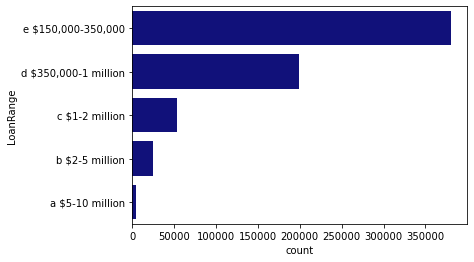

In [74]:
sns.countplot(data=df, y='LoanRange', order=df['LoanRange'].value_counts().index, color='darkblue')

In [75]:
gb = df.groupby('LoanRange').sum()

In [76]:
gb.reset_index(inplace=True)

Interestingly, the total number of jobs reported is highest for the 2nd-lower loans category. It actually decreases for the higher loan amounts. Potentially these higher loan amounts have more efficient companies.

<AxesSubplot:xlabel='JobsReported', ylabel='LoanRange'>

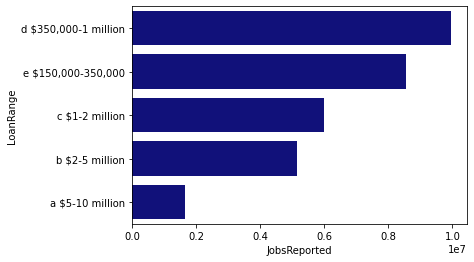

In [77]:
sns.barplot(data=gb,
            x='JobsReported',
            y='LoanRange',
            color='darkblue',
            order=gb.sort_values(by='JobsReported', ascending=False)['LoanRange'])

Number of jobs scales with loan amount, which makes sense. There are some outliers on the large side for the smaller loan amounts though.

<AxesSubplot:xlabel='JobsReported', ylabel='LoanRange'>

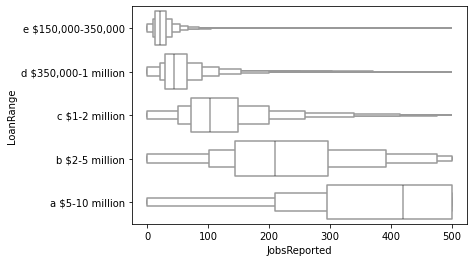

In [78]:
sns.boxenplot(data=df, x='JobsReported', y='LoanRange', order=df['LoanRange'].value_counts().index, color='white')

In [79]:
gb_state = df.groupby('State').sum()
gb_state.reset_index(inplace=True)

We can see a vast majority of loans are in a handful of states, with CA on top.

In [80]:
px.choropleth(gb_state, locations='State', locationmode='USA-states', scope='usa', color='LoanLowerBound')

In [81]:
gb_state.sort_values(by='LoanLowerBound', ascending=False).iloc[:5]

State           Zip     NAICSCode  JobsReported  LoanLowerBound  \
5     CA  8.168341e+09  4.376133e+10     3946382.0     33478500000   
47    TX  4.015589e+09  2.594860e+10     2649411.0     19589650000   
37    NY  5.423293e+08  2.392290e+10     2122314.0     19140200000   
10    FL  1.400384e+09  2.158343e+10     1899885.0     14008550000   
16    IL  1.666569e+09  1.366298e+10     1378424.0     11303900000   

    LoanUpperBound  
5      80634150000  
47     47237700000  
37     45840250000  
10     34015800000  
16     27036500000

In [82]:
gb_state['LoanLowerBound_billions'] = gb_state['LoanLowerBound'] / 1000000000

Text(0.5, 0, 'Total loans (billions)')

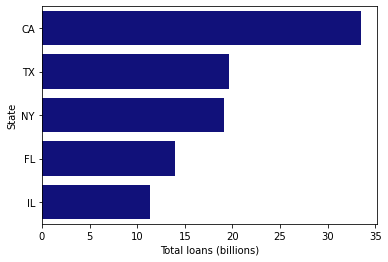

In [83]:
sns.barplot(data=gb_state,
            y='State',
            x='LoanLowerBound_billions',
            color='darkblue',
            order=gb_state.sort_values(by='LoanLowerBound', ascending=False).iloc[:5]['State'])
plt.xlabel('Total loans (billions)')

It appears the median jobs reported was 28, and the distribution is very asymmetric.

In [84]:
df['JobsReported'].median()

28.0

Text(0.5, 0, 'Jobs Reported')

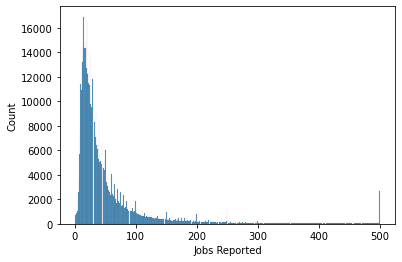

In [85]:
sns.histplot(data=df[df['JobsReported'] != 0], x='JobsReported')
plt.xlabel('Jobs Reported')

In [86]:
df.columns

Index(['LoanRange', 'BusinessName', 'Address', 'City', 'State', 'Zip',
       'NAICSCode', 'BusinessType', 'RaceEthnicity', 'Gender', 'Veteran',
       'NonProfit', 'JobsReported', 'DateApproved', 'Lender', 'CD',
       'LoanLowerBound', 'LoanUpperBound'],
      dtype='object')

We can see JP Morgan is the top lender, with a few other big banks in the top 5. Truist Bank is also in there, which warrants more investigation.

<AxesSubplot:xlabel='count', ylabel='Lender'>

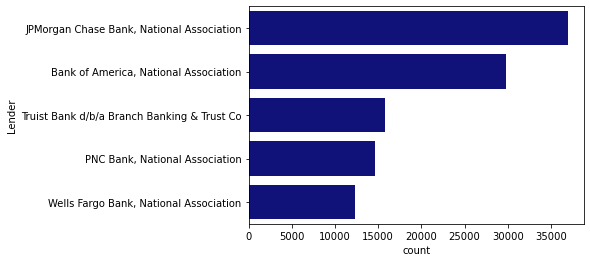

In [87]:
sns.countplot(data=df, y='Lender', color='darkblue', order=df['Lender'].value_counts().index[:5])

In [88]:
gb_date = df.groupby(['DateApproved', 'BusinessType']).count().groupby(level=-1).cumsum()
gb_date.reset_index(inplace=True)

In [90]:
gb_date.head()

DateApproved                         BusinessType  LoanRange  BusinessName  \
0   2020-04-03                          Cooperative         51            51   
1   2020-04-03                          Corporation       4421          4421   
2   2020-04-03  Employee Stock Ownership Plan(ESOP)         30            30   
3   2020-04-03              Independent Contractors          2             2   
4   2020-04-03      Limited  Liability Company(LLC)       2477          2477   

   Address  City  State   Zip  NAICSCode  RaceEthnicity  Gender  Veteran  \
0       51    51     51    51         51             51      51       51   
1     4421  4421   4421  4421       4420           4421    4421     4421   
2       30    30     30    30         30             30      30       30   
3        2     2      2     2          2              2       2        2   
4     2477  2477   2477  2477       2477           2477    2477     2477   

   NonProfit  JobsReported  Lender    CD  LoanLowerBound  LoanUpperBound  
0          0            51      51    51              51              51  
1          0          4421    4421  4421            4421            4421  
2          0            30      30    30              30              30  
3          0             2       2     2               2               2  
4          0          2477    2477  2477            2477            2477

<AxesSubplot:xlabel='DateApproved', ylabel='LoanRange'>

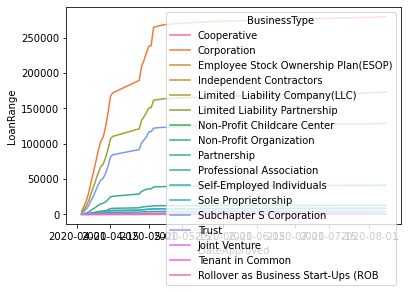

In [89]:
# since it is a cumulative sum of counts, we can use most any column for y
sns.lineplot(data=gb_date, x='DateApproved', y='LoanRange', hue='BusinessType')

<AxesSubplot:xlabel='count', ylabel='BusinessType'>

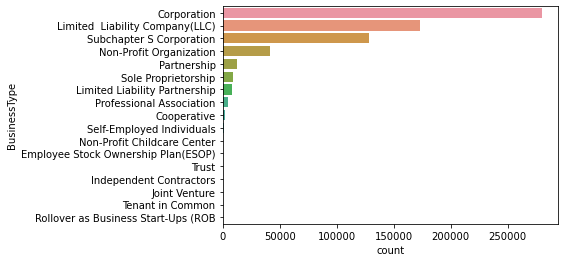

In [93]:
sns.countplot(data=df, y='BusinessType', order=df['BusinessType'].value_Lcounts().index)

In [94]:
#Break it down to the top 4
top_4_business_types = df['BusinessType'].value_counts().index[:4]

Text(0, 0.5, 'Cumulative Businesses Approved for Loans')

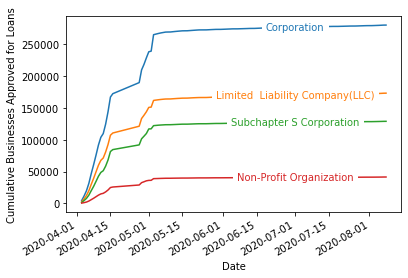

In [116]:
from labellines import labelLines

f = plt.figure()
ax = f.gca()
for biz in top_4_business_types:
    b_df = gb_date[gb_date['BusinessType'] == biz]
    ax.plot(b_df['DateApproved'], b_df['LoanRange'], label=biz)

# add some extra arguments to make it easier to read
labelLines(ax.get_lines(), xvals=[pd.to_datetime('7-1-2020')] * 4, align=False)

f.autofmt_xdate()  # auto-rotates to fit x-axis tick labels
plt.xlabel('Date')
plt.ylabel('Cumulative Businesses Approved for Loans')

As we can see, most loans were approved quickly, especially for corporations. Non-profits were the slowest to recieve loans. LLC's were next fastest after corporations.

In [133]:
sns.color_palette('colorblind')[:4]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0)]

<AxesSubplot:xlabel='count', ylabel='LoanRange'>

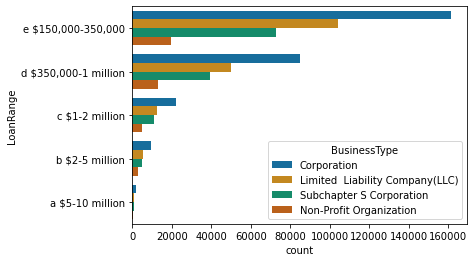

In [136]:
sns.countplot(data=df[df['BusinessType'].isin(top_4_business_types)],
            hue='BusinessType',
            y='LoanRange',
            order=df['LoanRange'].value_counts().index,
            hue_order=df[df['BusinessType'].isin(top_4_business_types)]['BusinessType'].value_counts().index,
            palette=sns.color_palette('colorblind'))

To conclude we can see that Corporations made up the bulk of the loans in all categories, especially the smaller loans. Intermediate loans were a little more equal and the biggest loans of 5-10M were dominated by corporations.